**Title: Predicting a Severity of Accident**

*a. Background*

The data used in this project is provided by Seattle Police Department. The goal of this project is to predict the severity of an accident based on the given collision data in the csv file. There are several groups who would be interested in this. To begin the everyday communuters, who would like to know given the factors like weather/ road conditions, the amount of traffic how severe an accident at that given time could be. This can help them develop a plan to take other route or if possible work from home. 

Further, the police department and other first responders would like to know the severity of the accidents to manuver the help that is needed for the victims as soon as possible. 

*b. Elementary Data Analysis:*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
df=pd.read_csv("/Users/Avanti/Desktop/Data-Collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.tail(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df.shape

(194673, 38)

In [8]:
import matplotlib.pyplot as plt

*1.Understanding realtionship of some of the major contributors to accident like weather condition, road condition, light condition, speed, kind of accident, to the occurance and severity of an accident.*

*i. Natural conditions: Weather condition, roadcondition and light condition*

In [9]:
df_wthr=df['WEATHER'].value_counts()

In [10]:
df_wthr.head(15)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [11]:
df_wthr.columns = ['Weather_condition', 'Occurances']
df_wthr.head()

Clear       111135
Raining      33145
Overcast     27714
Unknown      15091
Snowing        907
Name: WEATHER, dtype: int64

In [12]:
%matplotlib inline

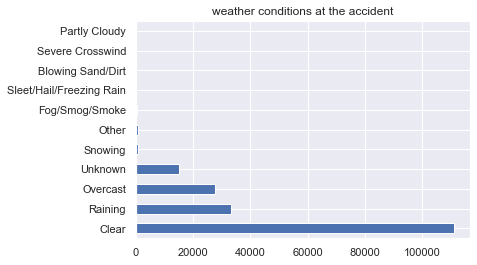

In [13]:
df_wthr.plot(kind='barh', title='weather conditions at the accident', yticks=[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])

As seen from this plot and above df_wthr that most accidents happened on a clear day, followed by raining, overcast, and unknown. 

*Now let us take a look at the data by grouping it with respect to the severitycode, this gives us an insight into the severity of the accidents. 

In [14]:
df_wrth_1=df.groupby(['SEVERITYCODE']).count()

In [15]:
df_wrth_1.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,132221,132221,136485,136485,136485,136485,136485,134750,37251,134081,...,132533,132405,460,81429,5802,136480,132622,136485,136485,136485
2,57118,57118,58188,58188,58188,58188,58188,57997,27819,57915,...,57128,57098,4207,33507,3531,58175,57147,58188,58188,58188


Based on the df_wrth_1 above we can see that there are only two severity codes in our data set, here 1 corresponds to property damage, while 2 corresponds to the injury. All the other column show the count of each of the attribute for given severity code. 

In [16]:
df_rd=df[['ROADCOND','SEVERITYCODE']]

In [17]:
df_rd.head()

,ROADCOND,SEVERITYCODE
0,Wet,2
1,Wet,1
2,Dry,1
3,Dry,1
4,Wet,2


In [18]:
df_rd_1=df_rd['ROADCOND'].value_counts()

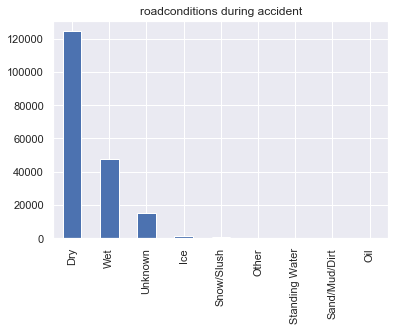

In [19]:
df_rd_1.plot(kind='bar', title='roadconditions during accident')

In [20]:
df_rd_1.head(10)

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [21]:
df_rd_wrth = df[['SEVERITYCODE', 'ROADCOND','WEATHER']]

In [22]:
df_rd_wrth.head()

,SEVERITYCODE,ROADCOND,WEATHER
0,2,Wet,Overcast
1,1,Wet,Raining
2,1,Dry,Overcast
3,1,Dry,Clear
4,2,Wet,Raining


In [23]:
df_rd_wrth.set_index(['SEVERITYCODE'], inplace=True)

In [24]:
df_rd_wrth.head()

,ROADCOND,WEATHER
SEVERITYCODE,,
2,Wet,Overcast
1,Wet,Raining
1,Dry,Overcast
1,Dry,Clear
2,Wet,Raining


In [25]:
df_lc=df[['LIGHTCOND','SEVERITYCODE']]

In [26]:
df_lc_1=df_lc['LIGHTCOND'].value_counts()

In [27]:
df_lc_1.head(15)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

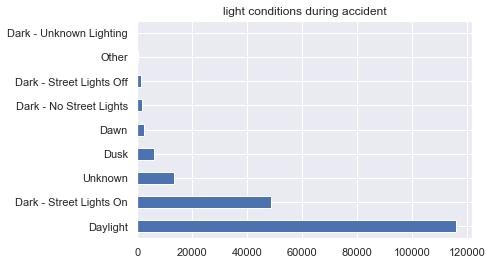

In [28]:
df_lc_1.plot(kind='barh', title='light conditions during accident')

The plot of lightconditions shows that most of the accidents occurred during daytime followed by when dark but street lights on. Unknown conditions, dusk, down, dark-no street lights, dark-street lights off follow respectively. 

*ii. driving information analysis: Speeding, Vehicle count, person count, pedistrian/ cycle, pedstrian count, hit parked car*

In [29]:
#Speeding data is not complete, hence moving on to vehicle count

In [30]:
df_vh=df[['VEHCOUNT', 'SEVERITYCODE']]

In [31]:
df_vh1=df_vh['VEHCOUNT'].value_counts().reset_index().values

In [32]:
df_vh1 #it is an array

array([[     2, 147650],
       [     1,  25748],
       [     3,  13010],
       [     0,   5085],
       [     4,   2426],
       [     5,    529],
       [     6,    146],
       [     7,     46],
       [     8,     15],
       [     9,      9],
       [    11,      6],
       [    10,      2],
       [    12,      1]])

In [33]:
df_vh2= pd.DataFrame(data=df_vh1[:,:])#converting array into an dataframe

In [34]:
df_vh2.head()

,0,1
0,2,147650
1,1,25748
2,3,13010
3,0,5085
4,4,2426


In [35]:
#chaging the header and index
df_vh2.columns=['num_vehicle','occurance']
df_vh2=df_vh2.set_index('num_vehicle')

In [36]:
df_vh2.head()

,occurance
num_vehicle,
2,147650
1,25748
3,13010
0,5085
4,2426


In [37]:
df_vh_11=df_vh2.iloc[0:5, :]
df_vh_12=df_vh2.iloc[5:13, :] #break the dataframe into two to get better plots. 

In [38]:
df_vh_11.head()

,occurance
num_vehicle,
2,147650
1,25748
3,13010
0,5085
4,2426


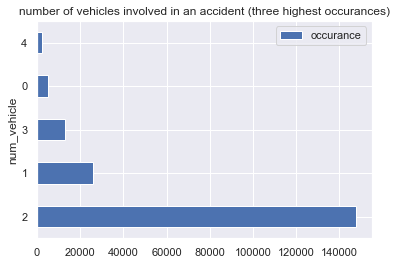

In [39]:
df_vh_11.plot(kind='barh', title='number of vehicles involved in an accident (three highest occurances)')

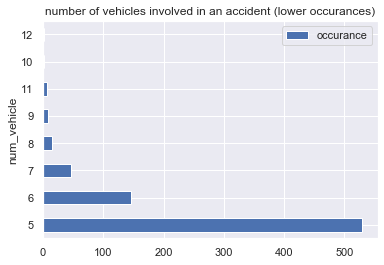

In [40]:
df_vh_12.plot(kind='barh', title='number of vehicles involved in an accident (lower occurances)')

From the two figures above we see that most accidents more than 140,000 have two cars, followed by accidesnts involving one car, then three, zero cars and four cars. Highest number of cars reported in this data set is 12 with one such recorded accident. 

In [41]:
df_vh3=df[['SEVERITYCODE','VEHCOUNT']]
df_vh3=df_vh3.set_index('SEVERITYCODE')
df_vh3.head()

,VEHCOUNT
SEVERITYCODE,
2,2
1,2
1,3
1,3
2,2


In [42]:
df_vh3.groupby(['SEVERITYCODE']).count()

,VEHCOUNT
SEVERITYCODE,
1,136485
2,58188


It is observed that for given data of vehicle count accidents most of the accidents were responsible for property damage than personnel injury. 

In [43]:
#Next let's explore the personcount column
df_pc=df[['SEVERITYCODE','PERSONCOUNT',]]
df_pc.groupby(['PERSONCOUNT']).count()
df_pc1=df_pc['PERSONCOUNT'].value_counts().reset_index().values

In [44]:
#df_pc1is an arrary too, let's change it into an dataframe
df_pc2= pd.DataFrame(data=df_pc1[:,:])#converting array into an dataframe
#chaging the header and index
df_pc2.columns=['PERSONCOUNT','occurance']
df_pc2=df_pc2.set_index('PERSONCOUNT')
df_pc2

,occurance
PERSONCOUNT,
2,114231
3,35553
4,14660
1,13154
5,6584
0,5544
6,2702
7,1131
8,533


In [45]:
df_pc_11=df_pc2.iloc[0:7, :]
df_pc_12=df_pc2.iloc[7: , :] #break the dataframe into two to get better plots. 

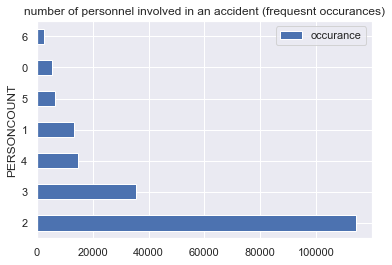

In [46]:
df_pc_11.plot(kind='barh', title='number of personnel involved in an accident (frequesnt occurances)')

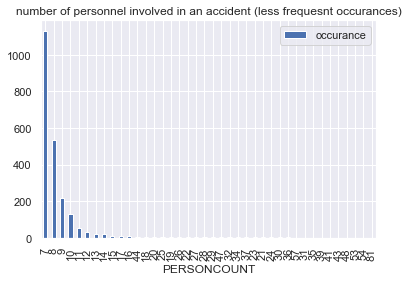

In [47]:
df_pc_12.plot(kind='bar', title='number of personnel involved in an accident (less frequesnt occurances)')

We observe that highest number of accidents reported two peronnel involvement, followed by three, four, one and five. Highest number of personnel involved was 81 in one case. 

In [48]:
#PedCyclcount this column gives us information if the accident involved pedistrian and bicycle. 
df_pct=df[['SEVERITYCODE','PEDCYLCOUNT']]
df_pct1=df_pct['PEDCYLCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pct2= pd.DataFrame(data=df_pct1[:,:])
#changing the header and index
df_pct2.columns=['PEDCYLCOUNT', 'occurance']
df_pct2=df_pct2.set_index('PEDCYLCOUNT')
df_pct2

,occurance
PEDCYLCOUNT,
0,189189
1,5441
2,43


This shows that most of the reported accidents do not have ped/ cycle involved in it. 

In [49]:
#PEDCOUNT this column gives us information about pedestrian involved in an accident
df_pdc=df[['SEVERITYCODE', 'PEDCOUNT']]
df_pdc1=df_pdc['PEDCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pdc2=pd.DataFrame(data=df_pdc1[:,:])
#changing the header and index
df_pdc2.columns=['PEDCOUNT','occurance']
df_pdc2=df_pdc2.set_index('PEDCOUNT')
df_pdc2

,occurance
PEDCOUNT,
0,187734
1,6685
2,226
3,22
4,4
6,1
5,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

We see that most of the occurances had no pedestrians involved. 

In [51]:
#SPEEDING this column has very few responses (only 9333) let's check this column and see what it tells us. 
df_s=df[['SEVERITYCODE','SPEEDING']]
df_s['SPEEDING'].fillna('N',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [52]:
df_s=df_s.set_index('SEVERITYCODE')
df_s.head()

,SPEEDING
SEVERITYCODE,
2,N
1,N
1,N
1,N
2,N


In [53]:
count_scode=df_s.groupby(['SEVERITYCODE']).count()
count_speeding=df_s['SPEEDING'].value_counts().reset_index().values

In [54]:
count_scode

,SPEEDING
SEVERITYCODE,
1,136485
2,58188


In [55]:
count_speeding

array([['N', 185340],
       ['Y', 9333]], dtype=object)

The above array shows that there were 9333 incidents that involved a speeding car, thus giving this a rather low priotity, however, we need to understand relationship between severity and speeding. 

In [56]:
from scipy import stats

In [57]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


We can see that non of these columns which have datatype float or int, we see that none of them have a strong correlation to SEVERITYCODE. 

This bring us to the plan for developing a ML model. We will emphasize on weather, roadcondition, and light conditions, while taking into consideration, vehicular attributes like vehicle count, personcount, pedcount, hitparkcar in our decision tree model. 

Data cleanup: Important part of the analysis. Check for rows with NaN and understand the statistics. Then remove the Nan rows and column. 

In [58]:
nan_values=df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()

In [59]:
print(columns_with_nan)

['X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC']


In [60]:
df['SPEEDING'].fillna('N',inplace=True)

In [61]:
nan_values=df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC']


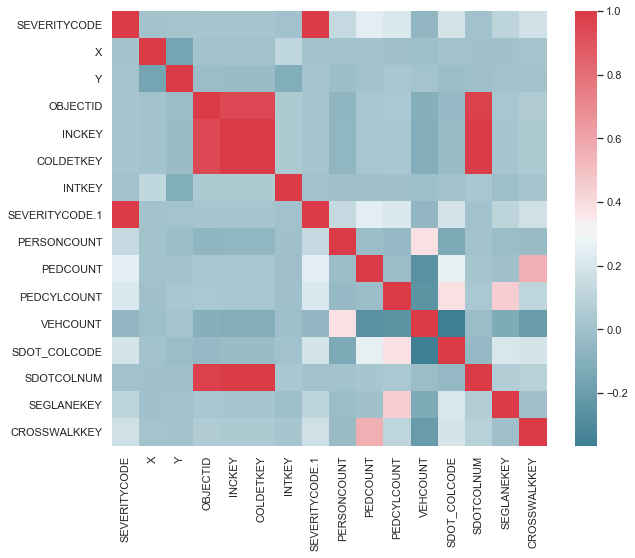

In [62]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

We can see that correlation is high between the columns

In [63]:
locations=df[['X','Y']]
locations.dropna(axis =0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
locations.isnull().values.any()

False

In [65]:
#conda install -c conda-forge folium

In [66]:
#import folium

In [67]:
locationlist= locations.values.tolist()
len(locationlist)

189339

In [68]:
#map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
#for point in range(0, len(locationlist)):
    #folium.Marker(locationlist[point]).add_to(map)
#map
##I won't be doing this analysis right now crashes my notebook

In [69]:
df2=df[['X', 'Y', 'SEVERITYCODE', 'SEVERITYDESC', 'LOCATION', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SPEEDING', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'HITPARKEDCAR','WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [70]:
#columns with missing values
nan_values=df2.isna()
nan_columns = nan_values.any()
columns_with_nan_1 = df2.columns[nan_columns].tolist()
print(columns_with_nan_1)

['X', 'Y', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']


In [71]:
df2.head()

,X,Y,SEVERITYCODE,SEVERITYDESC,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,CROSSWALKKEY,INCDATE,INCDTTM,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND
0,-122.323148,47.703140,2,Injury Collision,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,At Intersection (intersection related),N,0,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight
1,-122.347294,47.647172,1,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),N,0,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,N,Raining,Wet,Dark - Street Lights On
2,-122.334540,47.607871,1,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,Mid-Block (not related to intersection),N,0,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,N,Overcast,Dry,Daylight
3,-122.334803,47.604803,1,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,Mid-Block (not related to intersection),N,0,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight
4,-122.306426,47.545739,2,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,At Intersection (intersection related),N,0,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,N,Raining,Wet,Daylight


In [72]:
df2.dropna()

,X,Y,SEVERITYCODE,SEVERITYDESC,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,CROSSWALKKEY,INCDATE,INCDTTM,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND
0,-122.323148,47.703140,2,Injury Collision,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,At Intersection (intersection related),N,0,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight
1,-122.347294,47.647172,1,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),N,0,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,N,Raining,Wet,Dark - Street Lights On
2,-122.334540,47.607871,1,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,Mid-Block (not related to intersection),N,0,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,N,Overcast,Dry,Daylight
3,-122.334803,47.604803,1,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,Mid-Block (not related to intersection),N,0,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight
4,-122.306426,47.545739,2,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,At Intersection (intersection related),N,0,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,N,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,2,Injury Collision,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,Head On,3,0,0,2,Mid-Block (not related to intersection),N,0,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,N,Clear,Dry,Daylight
194669,-122.344526,47.690924,1,Property Damage Only Collision,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,Rear Ended,2,0,0,2,Mid-Block (not related to intersection),N,0,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,N,Raining,Wet,Daylight
194670,-122.306689,47.683047,2,Injury Collision,20TH AVE NE AND NE 75TH ST,Left Turn,3,0,0,2,At Intersection (intersection related),N,0,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,N,Clear,Dry,Daylight
194671,-122.355317,47.678734,2,Injury Collision,GREENWOOD AVE N AND N 68TH ST,Cycles,2,0,1,1,At Intersection (intersection related),N,0,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,N,Clear,Dry,Dusk


In [73]:
df2.shape

(194673, 19)

In [74]:
df2.head()

,X,Y,SEVERITYCODE,SEVERITYDESC,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,CROSSWALKKEY,INCDATE,INCDTTM,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND
0,-122.323148,47.703140,2,Injury Collision,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,At Intersection (intersection related),N,0,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight
1,-122.347294,47.647172,1,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),N,0,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,N,Raining,Wet,Dark - Street Lights On
2,-122.334540,47.607871,1,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,Mid-Block (not related to intersection),N,0,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,N,Overcast,Dry,Daylight
3,-122.334803,47.604803,1,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,Mid-Block (not related to intersection),N,0,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight
4,-122.306426,47.545739,2,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,At Intersection (intersection related),N,0,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,N,Raining,Wet,Daylight


**df2.a) Looking at Severity Code and Severity Desc**

In [75]:
df_scd = df2[['SEVERITYCODE','SEVERITYDESC']]
df_scd1=df_scd['SEVERITYDESC'].value_counts().reset_index().values#this is an array
df_scd2=df_scd['SEVERITYCODE'].value_counts().reset_index().values#this is an array

In [76]:
print(df_scd1)

[['Property Damage Only Collision' 136485]
 ['Injury Collision' 58188]]


In [77]:
print(df_scd2)

[[     1 136485]
 [     2  58188]]


*we see that we have two categories thus our predictions would be either of the two*

**b) analysing collision type**

In [78]:
df_c = df2[['SEVERITYCODE','COLLISIONTYPE']]
df_c=df2['COLLISIONTYPE'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_c1= pd.DataFrame(data=df_c[:,:])
#changing the header and index
df_c1.columns=['Collisiontype', 'occurance']
df_c1=df_c1.set_index('Collisiontype')
df_c1

,occurance
Collisiontype,
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956


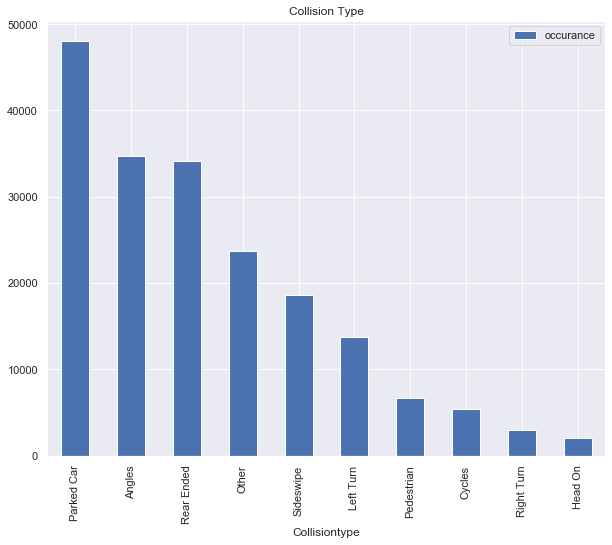

In [79]:
df_c1.plot(kind='bar', figsize= (10, 8), title='Collision Type')

In [80]:
df_c2 = df2[['SEVERITYCODE','COLLISIONTYPE']]
df_c2.groupby(['COLLISIONTYPE','SEVERITYCODE']).size()

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         1                 671
               2                4744
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     1                 672
               2                5936
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
dtype: int64

In [81]:
df_c2.groupby(['SEVERITYCODE','COLLISIONTYPE']).size()

SEVERITYCODE  COLLISIONTYPE
1             Angles           21050
              Cycles             671
              Head On           1152
              Left Turn         8292
              Other            17591
              Parked Car       45325
              Pedestrian         672
              Rear Ended       19419
              Right Turn        2347
              Sideswipe        16103
2             Angles           13624
              Cycles            4744
              Head On            872
              Left Turn         5411
              Other             6112
              Parked Car        2662
              Pedestrian        5936
              Rear Ended       14671
              Right Turn         609
              Sideswipe         2506
dtype: int64

In [82]:
df_c3=df_c2.groupby(['SEVERITYCODE','COLLISIONTYPE']).size().unstack()
df_c3

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
SEVERITYCODE,,,,,,,,,,
1,21050,671,1152,8292,17591,45325,672,19419,2347,16103
2,13624,4744,872,5411,6112,2662,5936,14671,609,2506


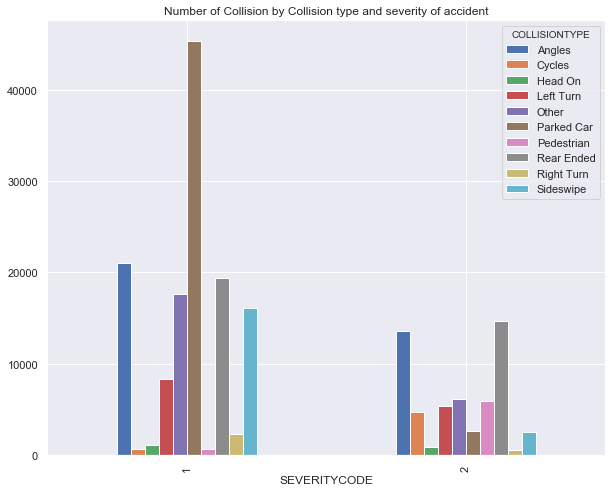

In [83]:
df_c3.plot(kind='bar', figsize = (10,8), title='Number of Collision by Collision type and severity of accident')

In [84]:
df_c4= df_c2.groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack()

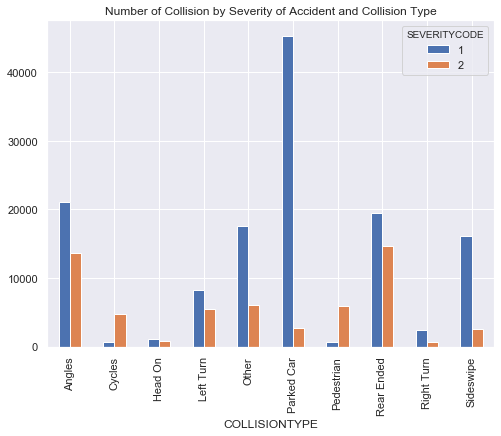

In [85]:
df_c4.plot(kind='bar', figsize = (8,6), title='Number of Collision by Severity of Accident and Collision Type')

**Number of People involved in an accident and how it does or doesnot affect Severity of an accident**

In [86]:
df_pc = df2[['SEVERITYCODE','PERSONCOUNT']]
df_pc=df2['PERSONCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pc1= pd.DataFrame(data=df_pc[:,:])
#changing the header and index
df_pc1.columns=['PERSONCOUNT', 'occurance']
df_pc1=df_pc1.set_index('PERSONCOUNT')
df_pc1

,occurance
PERSONCOUNT,
2,114231
3,35553
4,14660
1,13154
5,6584
0,5544
6,2702
7,1131
8,533


In [87]:
#Initial plot
#df_pc1.plot(kind='bar', figsize= (10, 8), title='PERSONCOUNT')

In [88]:
#groupby 
df_pc2 = df2[['SEVERITYCODE','PERSONCOUNT']]
df_pc3= df_pc2.groupby(['PERSONCOUNT','SEVERITYCODE']).size().unstack()
#df_pc3.plot(kind='bar', figsize = (20,8), title='Number of People Involved in an Accident and SEVERITY')

In [89]:
df_pc4= df_pc2.groupby(['SEVERITYCODE','PERSONCOUNT']).size().unstack()
df_pc4

PERSONCOUNT,0,1,2,3,4,5,6,7,8,9,...,39,41,43,44,47,48,53,54,57,81
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,3782.0,9858.0,86420.0,22092.0,8365.0,3615.0,1345.0,494.0,249.0,87.0,...,NaN,1.0,1.0,6.0,3.0,NaN,1.0,NaN,1.0,NaN
2,1762.0,3296.0,27811.0,13461.0,6295.0,2969.0,1357.0,637.0,284.0,129.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0


In [90]:
df_pc3

SEVERITYCODE,1,2
PERSONCOUNT,,
0,3782.0,1762.0
1,9858.0,3296.0
2,86420.0,27811.0
3,22092.0,13461.0
4,8365.0,6295.0
5,3615.0,2969.0
6,1345.0,1357.0
7,494.0,637.0
8,249.0,284.0


In [91]:
#break the dataframe into two to get better plots.
df_pc3_11=df_pc3.iloc[0:8, :]
df_pc3_12=df_pc3.iloc[8: , :] 

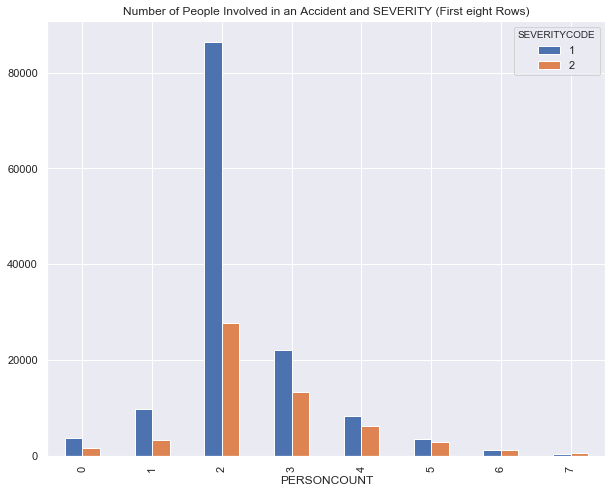

In [92]:
df_pc3_11.plot(kind='bar', figsize = (10,8), title='Number of People Involved in an Accident and SEVERITY (First eight Rows)')

In [93]:
#df_pc3_12.plot(kind='bar', figsize = (12,8), title='Number of People Involved in an Accident and SEVERITY (low frequency number)')

In [94]:
df_pd = df2[['SEVERITYCODE','PEDCOUNT']]
df_pd=df2['PEDCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pd1= pd.DataFrame(data=df_pd[:,:])
#changing the header and index
df_pd1.columns=['PEDCOUNT', 'occurance']
df_pd1=df_pd1.set_index('PEDCOUNT')
df_pd1

,occurance
PEDCOUNT,
0,187734
1,6685
2,226
3,22
4,4
6,1
5,1


In [95]:
df_pd2 = df2[['SEVERITYCODE','PEDCOUNT']]
df_pd3= df_pd2.groupby(['PEDCOUNT','SEVERITYCODE']).size().unstack()
df_pd3
#df_pd3.plot(kind='bar', figsize = (20,8), title='Number of Pedestrians Involved in an Accident and severity of an accident')

SEVERITYCODE,1,2
PEDCOUNT,,
0,135787.0,51947.0
1,678.0,6007.0
2,19.0,207.0
3,1.0,21.0
4,NaN,4.0
5,NaN,1.0
6,NaN,1.0


**Analysing Pedcylcount: Number of bicycles in an accident**

In [96]:
df_pdc2 = df2[['SEVERITYCODE','PEDCYLCOUNT']]
df_pdc3= df_pdc2.groupby(['PEDCYLCOUNT','SEVERITYCODE']).size().unstack()
df_pdc3

SEVERITYCODE,1,2
PEDCYLCOUNT,,
0,135806.0,53383.0
1,679.0,4762.0
2,NaN,43.0


**Analyzing vehicle count in an accident and the corresponding severity of an accident**

In [97]:
df_vh1 = df2[['SEVERITYCODE','VEHCOUNT']]
df_vh2= df_vh1.groupby(['VEHCOUNT','SEVERITYCODE']).size().unstack()
df_vh2

SEVERITYCODE,1,2
VEHCOUNT,,
0,3858.0,1227.0
1,11643.0,14105.0
2,111701.0,35949.0
3,7540.0,5470.0
4,1348.0,1078.0
5,268.0,261.0
6,86.0,60.0
7,24.0,22.0
8,10.0,5.0


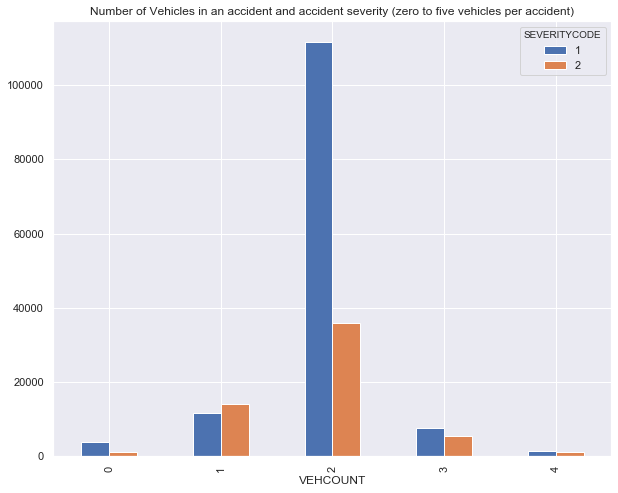

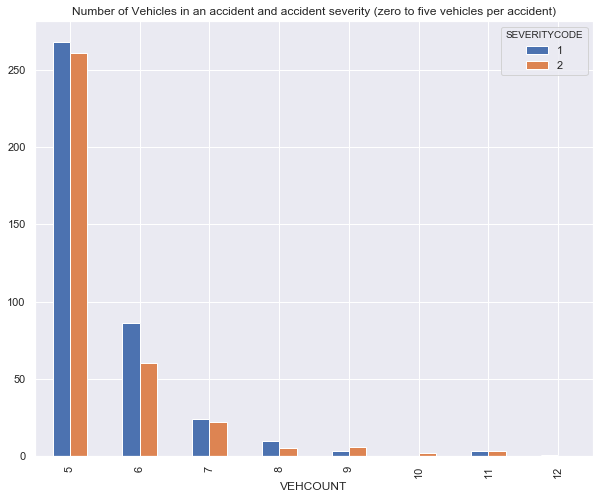

In [98]:
#break the dataframe into two to get better plots.
df_vh2_11=df_vh2.iloc[0:5, :]
df_vh2_12=df_vh2.iloc[5: , :] 
df_vh2_11.plot(kind='bar', figsize = (10,8), title='Number of Vehicles in an accident and accident severity (zero to five vehicles per accident)')
df_vh2_12.plot(kind='bar', figsize = (10,8), title='Number of Vehicles in an accident and accident severity (zero to five vehicles per accident)')

**Junctiontype and Severity code**

In [99]:
df_jt = df2[['SEVERITYCODE','JUNCTIONTYPE']]
df_jt1= df_jt.groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack()
df_jt1

SEVERITYCODE,1,2
JUNCTIONTYPE,,
At Intersection (but not related to intersection),1475,623
At Intersection (intersection related),35636,27174
Driveway Junction,7437,3234
Mid-Block (but intersection related),15493,7297
Mid-Block (not related to intersection),70396,19404
Ramp Junction,112,54
Unknown,7,2


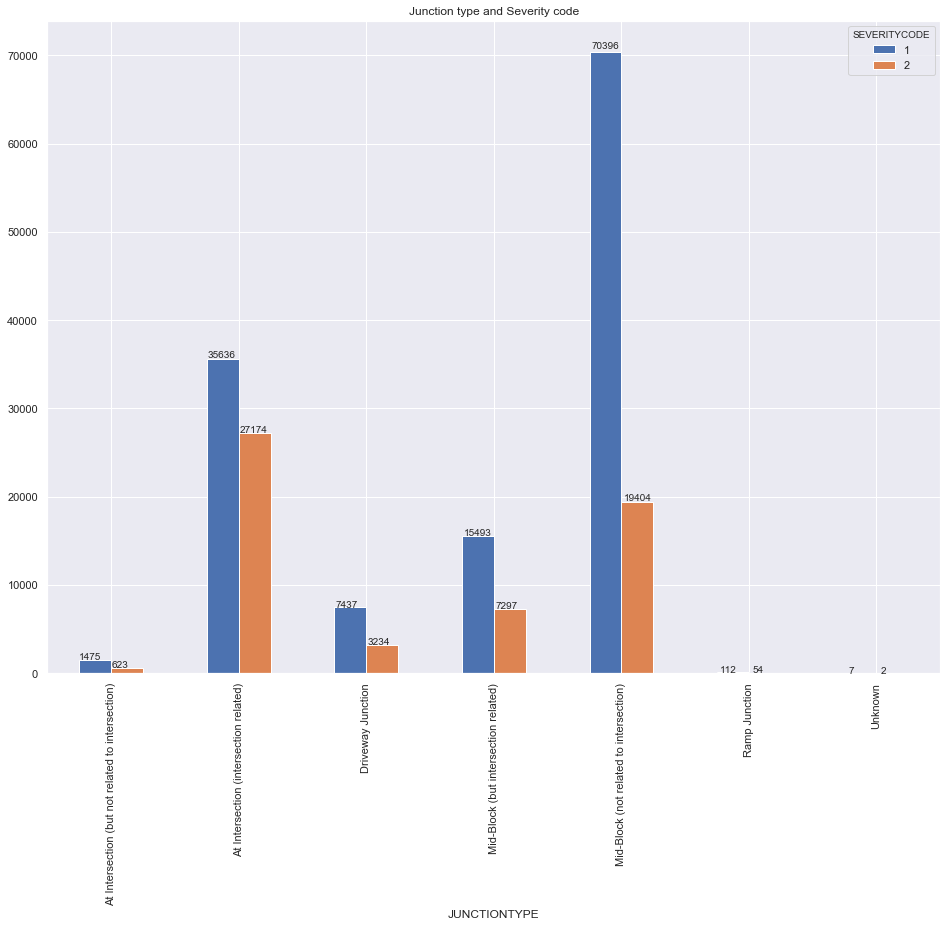

In [100]:
ax= df_jt1.plot(kind='bar', figsize = (16,12), title='Junction type and Severity code')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Speeding and severity code**

In [101]:
df_sp = df2[['SEVERITYCODE','SPEEDING']]
df_sp1= df_sp.groupby(['SPEEDING','SEVERITYCODE']).size().unstack()
df_sp1

SEVERITYCODE,1,2
SPEEDING,,
N,130683,54657
Y,5802,3531


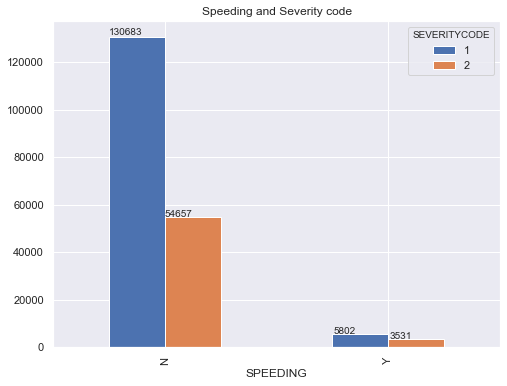

In [102]:
ax= df_sp1.plot(kind='bar', figsize = (8,6), title='Speeding and Severity code')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Cross walk and severity code**

In [103]:
df_cw = df2[['SEVERITYCODE','CROSSWALKKEY']]
df_cw1= df_cw.groupby(['CROSSWALKKEY','SEVERITYCODE']).size().unstack()
df_cw1

SEVERITYCODE,1,2
CROSSWALKKEY,,
0,136064.0,54798.0
523,NaN,1.0
7358,NaN,1.0
9073,NaN,1.0
10590,NaN,1.0
...,...,...
701110,NaN,1.0
701280,NaN,1.0
701306,NaN,1.0


*observation: vast majority of the accidents do not have crosswalks invovlved. But when they do there is always a injury associated with it*

**HITPARKED CAR**

In [104]:
df_ht = df2[['SEVERITYCODE','HITPARKEDCAR']]
df_ht1= df_ht.groupby(['HITPARKEDCAR','SEVERITYCODE']).size().unstack()
df_ht1

SEVERITYCODE,1,2
HITPARKEDCAR,,
N,129717,57740
Y,6768,448


**WEATHER and SEVERITY CODE**

In [105]:
df_wtr = df2[['SEVERITYCODE','WEATHER']]
df_wtr1= df_wtr.groupby(['WEATHER','SEVERITYCODE']).size().unstack()
df_wtr1

SEVERITYCODE,1,2
WEATHER,,
Blowing Sand/Dirt,41,15
Clear,75295,35840
Fog/Smog/Smoke,382,187
Other,716,116
Overcast,18969,8745
Partly Cloudy,2,3
Raining,21969,11176
Severe Crosswind,18,7
Sleet/Hail/Freezing Rain,85,28


**LIGHTCOND and SEVERITY CODE**

In [106]:
df_lc = df2[['SEVERITYCODE','LIGHTCOND']]
df_lc1= df_lc.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack()
df_lc1

SEVERITYCODE,1,2
LIGHTCOND,,
Dark - No Street Lights,1203,334
Dark - Street Lights Off,883,316
Dark - Street Lights On,34032,14475
Dark - Unknown Lighting,7,4
Dawn,1678,824
Daylight,77593,38544
Dusk,3958,1944
Other,183,52
Unknown,12868,605


**ROADCOND and SEVERITY CODE**

In [108]:
# df_rc = df2[['SEVERITYCODE','ROADCOND']]
df_rc1= df2.groupby(['ROADCOND','SEVERITYCODE']).size().unstack()
df_rc1

SEVERITYCODE,1,2
ROADCOND,,
Dry,84446,40064
Ice,936,273
Oil,40,24
Other,89,43
Sand/Mud/Dirt,52,23
Snow/Slush,837,167
Standing Water,85,30
Unknown,14329,749
Wet,31719,15755


In [113]:
#Datetime
#df2['INCDTTM'] = pd.to_datetime(df2['INCDTTM'])
#df_ttm = df2.groupby(pd.Grouper(key='INCDTTM',freq='180min')).sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
#df_ttm

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,CROSSWALKKEY
INCDTTM,,,,,,,,
2004-01-01 00:00:00,-2691.246182,1047.726789,35,80,0,0,51,0
2004-01-01 03:00:00,0.000000,0.000000,0,0,0,0,0,0
2004-01-01 06:00:00,0.000000,0.000000,0,0,0,0,0,0
2004-01-01 09:00:00,0.000000,0.000000,0,0,0,0,0,0
2004-01-01 12:00:00,0.000000,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-05-19 12:00:00,0.000000,0.000000,0,0,0,0,0,0
2020-05-19 15:00:00,0.000000,0.000000,0,0,0,0,0,0
2020-05-19 18:00:00,0.000000,0.000000,0,0,0,0,0,0


# Machine Learning Model 
## Setting it up: Using 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

In [ ]:
df3=df2[['SEVERITYCODE','WEATHER', 'ROADCOND','PEDCYLCOUNT','JUNCTIONTYPE','VEHCOUNT','SPEEDING','HITPARKEDCAR']]

In [ ]:
objList = df3.select_dtypes(include = "object").columns
print (objList)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df3[feat] = le.fit_transform(df3[feat].astype(str))

print (df.info())


In [ ]:
#y = df3.SEVERITYCODE
# Create X
#features = ['WEATHER','ROADCOND','PEDCYLCOUNT','JUNCTIONTYPE','VEHCOUNT','SPEEDING']
#X = df3[features]

In [ ]:


# Specify Model
#sc_model = DecisionTreeRegressor(random_state=1)
# Fit Model
#sc_model.fit(train_X, train_y)

In [ ]:
#val_predictions = sc_model.predict(val_X)
#val_mae = mean_absolute_error(val_predictions, val_y)
#print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

In [ ]:
#sc_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
#sc_model.fit(train_X, train_y)
#val_predictions = sc_model.predict(val_X)
#val_mae = mean_absolute_error(val_predictions, val_y)
#print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))
clf = tree.DecisionTreeClassifier()

In [ ]:
#features = ['WEATHER','ROADCOND','PEDCYLCOUNT','JUNCTIONTYPE','VEHCOUNT','SPEEDING','HITPARKEDCAR']
features = ['PEDCYLCOUNT','JUNCTIONTYPE','VEHCOUNT','SPEEDING','HITPARKEDCAR']
X = df3[features]
Y = df[['SEVERITYCODE']]

In [ ]:
from sklearn.metrics import mean_squared_error
# Split into validation and training data
train_X, val_X, train_Y, val_y = train_test_split(X, Y, random_state=1)
#clf = tree.DecisionTreeClassifier()
clf.fit(train_X, train_Y)
predict_clf = clf.predict(val_X)
predict_clf
val_mae = mean_absolute_error(predict_clf, val_y) 
val_mse= mean_squared_error(predict_clf, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {}".format(val_mae))
print("Validation MSE when not specifying max_leaf_nodes: {}".format(val_mse))

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(clf) 

In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("classifier") 